## Exercise 1

## Exercise 2

Running clustering on blob dataset...


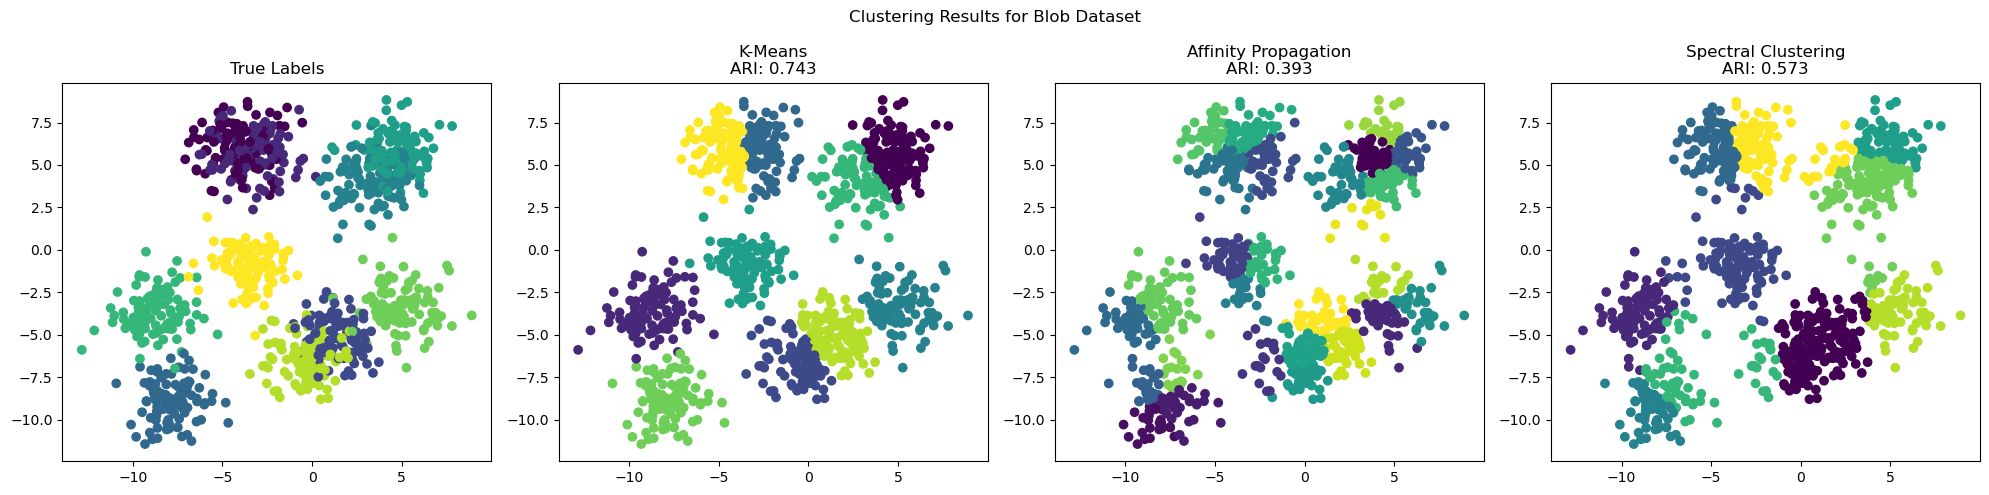


Evaluation metrics for Blob Dataset:
----------------------------------------
K-Means ARI: 0.743
Affinity Propagation ARI: 0.393
Spectral Clustering ARI: 0.573
Number of clusters found - AP: 27

Running clustering on checkerboard dataset...


/Users/dennisschielke/miniconda3/envs/pie/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


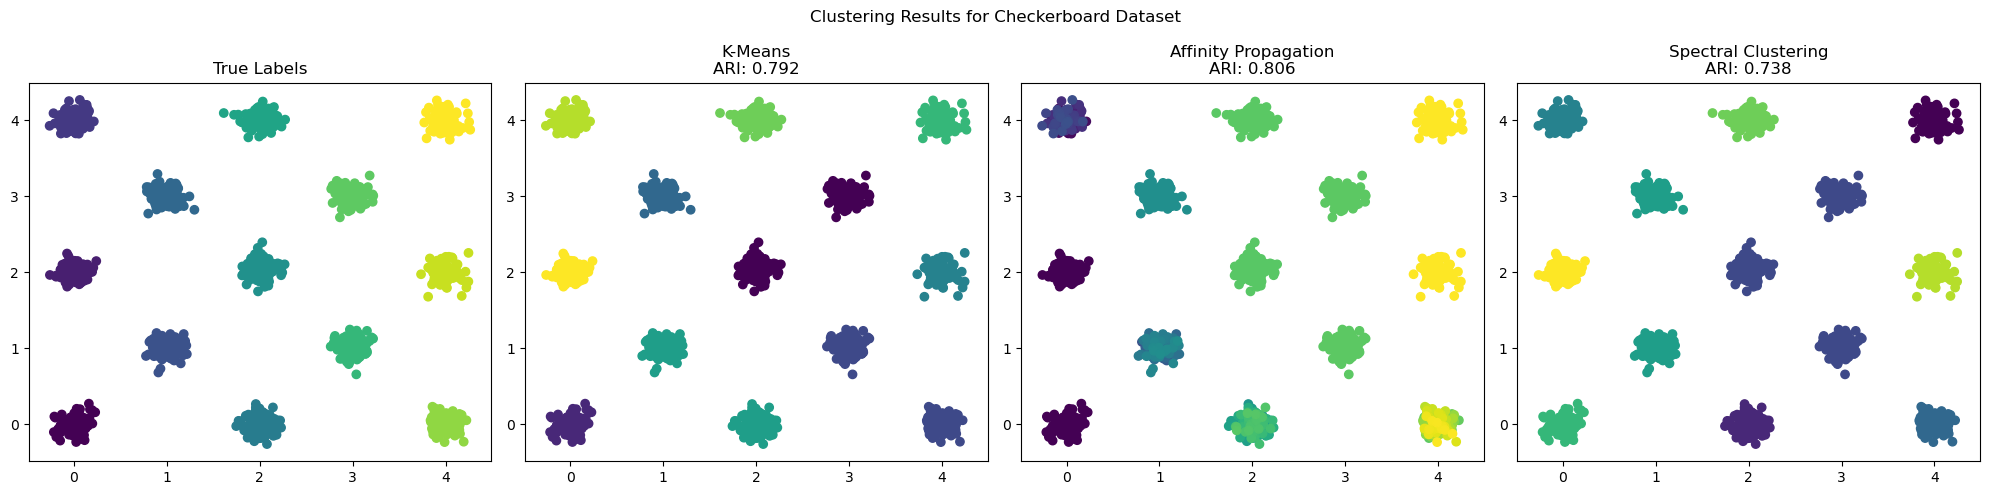


Evaluation metrics for Checkerboard Dataset:
----------------------------------------
K-Means ARI: 0.792
Affinity Propagation ARI: 0.806
Spectral Clustering ARI: 0.738
Number of clusters found - AP: 408


In [26]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering

n_clusters = 10 

# Create the 2 datasets
X, y = make_blobs(n_samples=1000, centers=n_clusters, cluster_std=1.2, random_state=69)

def generate_checkerboard_data(n_samples, n_clusters, blocks, noise=0.1):
    samples_per_cluster = n_samples // n_clusters
    X = []
    y = []
    temp = 0
    for i in range(blocks):
        for j in range(blocks):
            if (i + j) % 2 == 0:
                x = np.random.normal(i * 1, noise, samples_per_cluster)
                y_coord = np.random.normal(j * 1, noise, samples_per_cluster)
                
                X.extend(list(zip(x, y_coord)))
                y.extend([temp] * samples_per_cluster)
                temp += 1
    return np.array(X), np.array(y)

X2, y2 = generate_checkerboard_data(1000, n_clusters, 5)

def transform_for_model(X, modelname):
    if modelname == "k-means":
        scaler = StandardScaler()
        X_transformed = scaler.fit_transform(X)
        return X_transformed
    elif modelname == "spectral" or modelname == "affinity":
        # Compute RBF kernel similarity matrix for both Spectral and Affinity
        gamma = 1.0 / (X.shape[1] * X.var())
        similarity_matrix = rbf_kernel(X, gamma=gamma)
        
        if modelname == "affinity":
            # Scale similarities for Affinity Propagation
            similarity_matrix = -50 * (1 - similarity_matrix)
            
        return similarity_matrix

# Function to run clustering on both datasets
def run_clustering(X, y, dataset_name):
    # Transform data for each algorithm
    X_kmeans = transform_for_model(X, "k-means")
    X_affinity = transform_for_model(X, "affinity")
    X_spectral = transform_for_model(X, "spectral")
    
    # Perform clustering
    # K-means
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=69)
    kmeans_labels = kmeans.fit_predict(X_kmeans)

    # Affinity Propagation
    affin = AffinityPropagation(random_state=69, affinity='precomputed')
    affin_labels = affin.fit_predict(X_affinity)

    # Spectral Clustering
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=69)
    spectral_labels = spectral.fit_predict(X_spectral)

    # Plot results
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle(f'Clustering Results for {dataset_name}')
    
    # Original data with true labels
    ax[0].scatter(X[:, 0], X[:, 1], c=y)
    ax[0].set_title("True Labels")
    
    ax[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels)
    ax[1].set_title(f"K-Means\nARI: {adjusted_rand_score(y, kmeans_labels):.3f}")
    
    ax[2].scatter(X[:, 0], X[:, 1], c=affin_labels)
    ax[2].set_title(f"Affinity Propagation\nARI: {adjusted_rand_score(y, affin_labels):.3f}")
    
    ax[3].scatter(X[:, 0], X[:, 1], c=spectral_labels)
    ax[3].set_title(f"Spectral Clustering\nARI: {adjusted_rand_score(y, spectral_labels):.3f}")
    
    plt.tight_layout()
    plt.show()
    
    # Print evaluation metrics
    print(f"\nEvaluation metrics for {dataset_name}:")
    print("----------------------------------------")
    print(f"K-Means ARI: {adjusted_rand_score(y, kmeans_labels):.3f}")
    print(f"Affinity Propagation ARI: {adjusted_rand_score(y, affin_labels):.3f}")
    print(f"Spectral Clustering ARI: {adjusted_rand_score(y, spectral_labels):.3f}")
    print(f"Number of clusters found - AP: {len(np.unique(affin_labels))}")

# Run clustering on both datasets
print("Running clustering on blob dataset...")
run_clustering(X, y, "Blob Dataset")

print("\nRunning clustering on checkerboard dataset...")
run_clustering(X2, y2, "Checkerboard Dataset")